Implémentation du modèle KMeans

Pseudo-Code

Les deux paramètres principaux de ct algorithme sont :
- k le nombre de clusters à construire 
- fonction utilisée pour le calul des distsances entre les observations : ici on va choisir la distance euclidiennes

1) Entrées & sorties (base de KMean)
Entrées : 
- en semble d'observation X (n×d, float64), 
 - k (nb de clusters),correspondant au nb de clusters à construire. 
 - une fonction de distance F ici euclidienne : pour rappel la disance euclidienne est caluclée suivant la forumle suivante :
 dist = sqrt((xa-xb)²+(ya-yb)²)
 - n_init (restarts) généralement de 10

Sorties : centroids (k×d), labels (n,), inertia (somme des distances² au centroïde assigné), n_iter.


2) Préparation des données
- Vérifier k ≤ n
- pas de NaN (ou les gérer), 
- typer en float
- standardiser
=> créer  les fonctions de préparation du jeu de données. 

3)  on va créer une partition de l'ensemble X en k clusters 
- 1 /initier aléatoirement des centroids => fonction make_blobs a initié directement les centroids dans le jeu de données donc juste à les chercher 
on va donc les réucpérer. 
- 2 / répéter
        - a) pour chaque observation Xi, calucler la distance euclidiennes des points avec les centroids
        - b) associer chaque observation Xi au cluster dont le centre est le plus proche de Xi
        - c) Recalculer les centroids
- 3/ Reprendre au point 2/ jusquà ce que les centroids deviennent stables 
=> créer toutes les fonctions 

4) créer la classe qui appelle
- fonction prépa de données 
- fonction kmean pour un run 
- fonction fit => appel kmean et recherche le meilleur centroid
- fonction fit_predict => retourne juste les sorties issus de fit
- fonction predict => prédit pour de nouvelles données avec les valeurs issues de fit


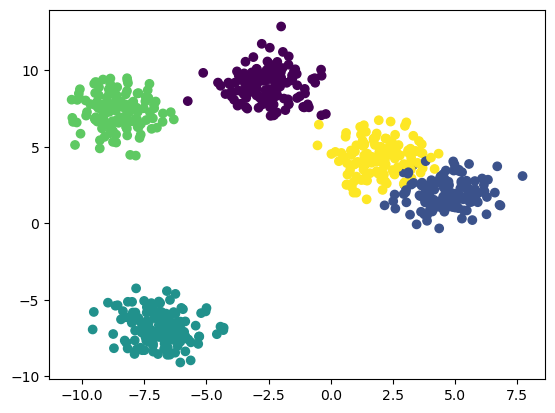

In [ ]:
 ### Creation of a dataset with make_blobs from sklearn.datasets   
 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Build a toy dataset with make_blobs => 5 clusters in 2D
k = 5
nb_samples = 700
nb_features = 2
X, y, centers = make_blobs(n_samples=nb_samples, centers=k,
                           n_features=nb_features, return_centers=True,random_state=42)
### plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)

WCSS: 46.062030243498974 iters: 19


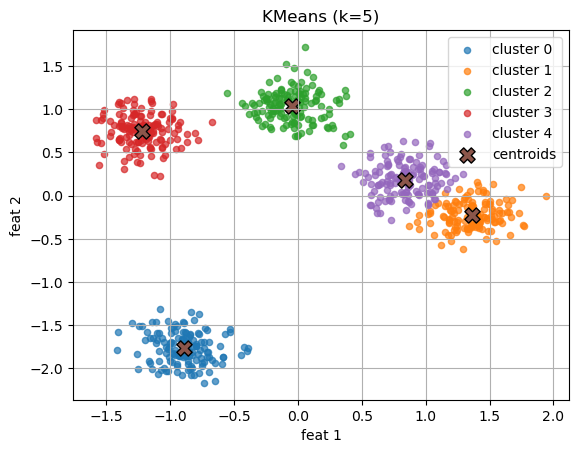

In [3]:
# 1) prépa (optionnelle)
from KMeans_clustering import KMeans 

k=5
### appel de la classe KMeans
km = KMeans(k=k, n_init=10, random_state=42) 

### Préparation du jeu de données => standadirsation , gestion des NaN, et autres
X_ready, prep = km.prepare_data_for_kmeans(X, nan_strategy="impute", standardize=True)

# Entraînement
km.fit(X_ready)
labels = km.fit_predict(X_ready)
print("WCSS:", km.inertia_, "iters:", km.n_iter_)

# Visualisation des clusters et des centroids
km.plot_clusters(X_ready, title="KMeans (k=5)")

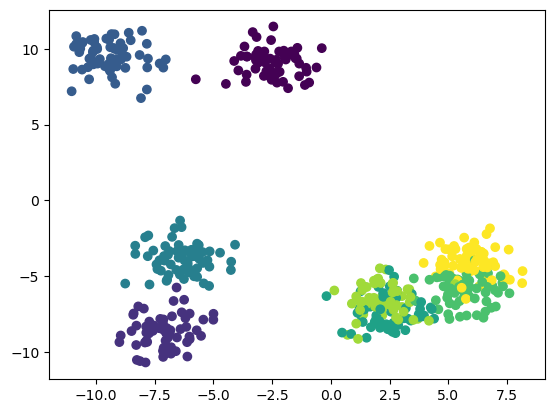

In [ ]:
### autre jeu de données 8 clusters, 5 dimensions
# Build a toy dataset with make_blobs
k = 8
nb_samples = 500
nb_features = 5

X, y, centers = make_blobs(n_samples=nb_samples, centers=k,
                           n_features=nb_features, return_centers=True,random_state=42)
### plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)


WCSS: 77.70759862798658 iters: 4


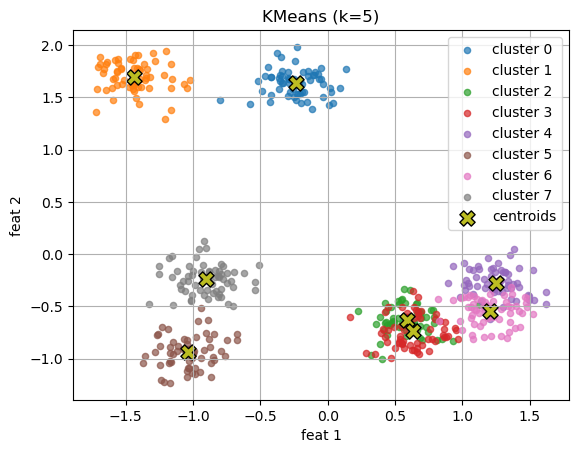

In [ ]:
### appel de la classe KMeans
km = KMeans(k=k, n_init=10, random_state=42) 
### Préparation du jeu de données => standadirsation , gestion des NaN, et autres
X_ready, prep = km.prepare_data_for_kmeans(X, nan_strategy="impute", standardize=True)
# Entraînement
km.fit(X_ready)
labels = km.fit_predict(X_ready)
print("WCSS:", km.inertia_, "iters:", km.n_iter_)
# Visualisation des clusters et des centroids
km.plot_clusters(X_ready, title="KMeans (k=5)")